---

### Комментарий наставника

Привет, Александр! Спасибо за вовремя сданную работу :)

Мне понравилась твоя работа. В особенности, с точки зрения визуализации и технических решений. Все лаконично. Там где надо, были разработаны функции.

Обращаю внимание на выводы. Хотелось бы, чтобы они были насыщенней, потому что хочется задать в ответ массу вопросов. Так не должно быть. От аналитика ждут всестороннего рассмотрения вопроса, поэтому твоё мнение на счёт увиденного крайне важно. Допиши выводы, и я приму твою работу.

Остальное ты сможешь прочитать в комментариях. Их ты увидишь в соответствующих ячейках.

---

#### Аналитика в авиакомпании

Шаг 4. Аналитика средствами Python

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

query_1.csv — результат первого запроса. В нём содержится информация о:
    
model — модели самолета

flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

query_3.csv — результат третьего запроса. В нём содержится информация о:
city — городах

average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
    
импортировать файлы;
изучить данные в них;

проверить типы данных на корректность;

выбрать топ-10 городов по количеству рейсов;

построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
    
сделать выводы по каждому из графиков, пояснить результат.

Шаг 5. Проверка гипотезы средствами Python

query_last.csv — результат последнего запроса. В нём следующая информация:
    
week_number — номер недели;

ticket_amount — количество проданных билетов за неделю;

festival_week — есть ли на этой неделе фестиваль;

festival_name — название фестиваля.

Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».
    
Пороговое значение alpha задайте самостоятельно.

Поясните:
    
как вы формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.

Описание данных 

База данных об авиаперевозках:
    
Таблица airports — информация об аэропортах:
    
airport_code — трёхбуквенный код аэропорта

airport_name — название аэропорта

city — город

timezone — временная зона

Таблица aircrafts — информация об самолётах:
    
aircraft_code — код модели самолёта

model — модель самолёта

range — количество самолётов

Таблица tickets — информация о билетах:
    
ticket_no — уникальный номер билета

passenger_id — персональный идентификатор пассажира

passenger_name — имя и фамилия пассажира

Таблица flights — информация о рейсах:
    
flight_id — уникальный идентификатор рейса

departure_airport — аэропорт вылета

departure_time — дата и время вылета

arrival_airport — аэропорт прилёта

arrival_time — дата и время прилёта

aircraft_code – id самолёта

Таблица ticket_flights — стыковая таблица «рейсы-билеты»

ticket_no — номер билета

flight_id — идентификатор рейса

Таблица festivals — информация о фестивалях

festival_id — уникальный номер фестиваля

festival_date — дата проведения фестиваля

festival_city — город проведения фестиваля

festival_name — название фестиваля

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns

#### 1.Получение общей информации о данных

In [3]:
aircrafts = pd.read_csv('/datasets/query_1.csv')
city_flights = pd.read_csv('/datasets/query_3.csv')
festivals_flights = pd.read_csv('/datasets/query_last.csv')

In [4]:
def information(data):
    print('-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --')
    print()
    print('----------------------------------------------')
    print(data.head(10))
    print('----------------------------------------------')
    print()
    print(data.info())

---

### Комментарий наставника

Плюсую за разработку собственных функций :)

---

In [5]:

information(aircrafts)

-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --

----------------------------------------------
                 model  flights_amount
0      Airbus A319-100             607
1      Airbus A321-200             960
2       Boeing 737-300             630
3       Boeing 767-300             600
4       Boeing 777-300             300
5   Bombardier CRJ-200            4446
6   Cessna 208 Caravan            4557
7  Sukhoi SuperJet-100            4185
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes
None


В таблице 'aircrafts' отражены данные о совершавших перелеты суднах за сентябрь 2018 года. 

Пропуски отсутствуют, типы данных соответствуют ожидаемым - информация о моделях самолета 

хранится в "object", о количестве совершенных на них перелетах в сентябре - в типе данных "int".

Предобработка не требуется.

In [6]:
information(city_flights)

-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --

----------------------------------------------
           city  average_flights
0        Абакан         3.870968
1       Анадырь         1.000000
2         Анапа         2.161290
3   Архангельск         5.354839
4     Астрахань         2.451613
5       Барнаул         2.612903
6      Белгород         6.000000
7    Белоярский         2.000000
8  Благовещенск         1.000000
9        Братск         1.000000
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


В таблице 'city_flights' отражены данные о совершенных в среднем прилетах в сентябре 2018 года в города.

Пропуски отсутствуют, типы данных соответствуют ожидаемым - информация о городах хранится в "object", 

о среднем количестве совершенных прилетов в сентябре - в типе данных "float".

Предобработка не требуется.

In [7]:
information(festivals_flights)

-- ИНФОРМАЦИЯ О ТАБЛИЦЕ --

----------------------------------------------
   week_number  ticket_amount  festival_week festival_name
0           30          43568           30.0     Park Live
1           31          51034           31.0  Пикник Афиши
2           32          51675            NaN           NaN
3           33          51378            NaN           NaN
4           34          51492            NaN           NaN
5           35          51360            NaN           NaN
6           36          51386           36.0       Видфест
7           37          51670            NaN           NaN
8           38          51518            NaN           NaN
9           39          51623            NaN           NaN
----------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 no

#### 2. Топ-10 городов по количеству рейсов

In [8]:

# Отберем города с самым насыщенным воздушным сообщением

top_10_city = city_flights.sort_values(by = 'average_flights', ascending = False).head(10).reset_index()
top_10_city

,index,city,average_flights
0,43,Москва,129.774194
1,70,Санкт-Петербург,31.161290
2,54,Новосибирск,17.322581
3,33,Красноярск,11.580645
4,20,Екатеринбург,11.322581
5,67,Ростов-на-Дону,10.193548
6,63,Пермь,10.129032
7,10,Брянск,10.000000
8,74,Сочи,9.612903
9,84,Ульяновск,9.580645


In [ ]:
Из таблицы видно , есть три города с самым насыщенным воздушным сообщением это Москва , Питер и Новосибирск 
это ожидаемо так как это крупнейшие города , далее идут города миллионники что тоже ожидаемо .

---

### Комментарий наставника

Здесь стоило бы написать небольшой вывод по увиденному. Например, описать свои предположения об увиденном. Почему так, а не иначе?

---

#### 3. Графический раздел

In [9]:
def for_plot(data, x, y):
    """"призвана строить графики в единообразном стиле"""
    sns.set_palette('pastel')
    plt.figure(figsize=(18,4))
    sns.barplot(x = x, y = y, data = data)
    plt.xlabel(x)
    plt.xticks(rotation=90)
    plt.ylabel(y)
    plt.palette = 'Blues'
    plt.show()
    print(data.sort_values(by = y, ascending = False).head(10).reset_index(drop=True))
    print('-------------------------------------')
    print('В среднем:', data[y].mean())
    print('-------------------------------------')

#### Модели самолетов и количество рейсов

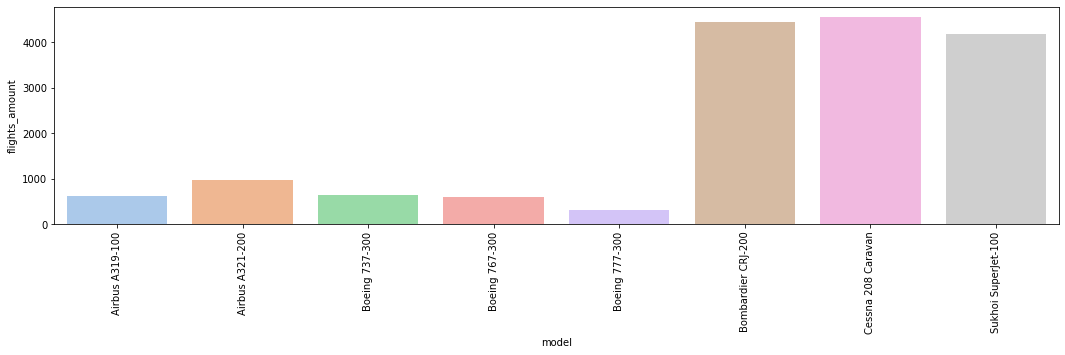

                 model  flights_amount
0   Cessna 208 Caravan            4557
1   Bombardier CRJ-200            4446
2  Sukhoi SuperJet-100            4185
3      Airbus A321-200             960
4       Boeing 737-300             630
5      Airbus A319-100             607
6       Boeing 767-300             600
7       Boeing 777-300             300
-------------------------------------
В среднем: 2035.625
-------------------------------------


In [10]:

for_plot(aircrafts, 'model', 'flights_amount')

Наиболее используемыми моделями являются "Цесна 208 Караван" и "Бомбардир ЦРДЖЕЙ - 200" и СуперДжет. Можно сказать , большинство   рейсов  более 80 % осуществляется этими моделями, они составляют основной полетный парк , возможно это связано с тем что эти самолеты более дешевые на рынке и аэропортам проще их приобретать и обслуживать. Хотя конечно Airbus и  Boeing считаются более надежными , но этом чисто мое субъективное мнение. Можно бы было конечно пофантазировать если бы мы например мы знали как обновляется полетный парк,тогда бы ситуация была несколько другой.

---

### Комментарий наставника

Думаю, ты забыл указать Суперджет, потому что они в целом похожи по количество перевозок.

Аналогично с пунктом выше, здесь стоит написать вывод об увиденном.

Одних наблюдений мало. От тебя, как от аналитика, будут ждать каких-то предположений, гипотез, фактов. Ведь твоя работа - ключевая часть принятия решения руководителем.

---

#### Города и количество рейсов

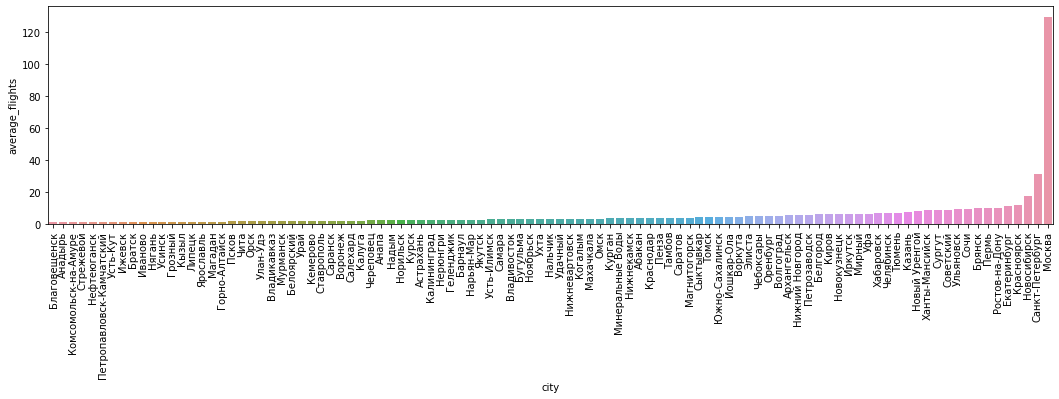

              city  average_flights
0           Москва       129.774194
1  Санкт-Петербург        31.161290
2      Новосибирск        17.322581
3       Красноярск        11.580645
4     Екатеринбург        11.322581
5   Ростов-на-Дону        10.193548
6            Пермь        10.129032
7           Брянск        10.000000
8             Сочи         9.612903
9        Ульяновск         9.580645
-------------------------------------
В среднем: 5.494189113891766
-------------------------------------


In [11]:
for_plot(city_flights.sort_values(by = 'average_flights'), 'city', 'average_flights')

#### Большинство городов в день не принимают и 10 рейсов , как видно из таблицы больше 70% рейсов осуществляется в три города Москва , Питер и Новосибирск (это и понятно это крупнейшие города России)  далее идут города миллионники и другие города , что в принципе и понятно. (количество рейсов и население городов имеет прямую зависимость)

---

### Комментарий наставника

Здорово, но опять же, опиши подробнее, что ты видишь.

---

#### Топ-10 городов и количество рейсов

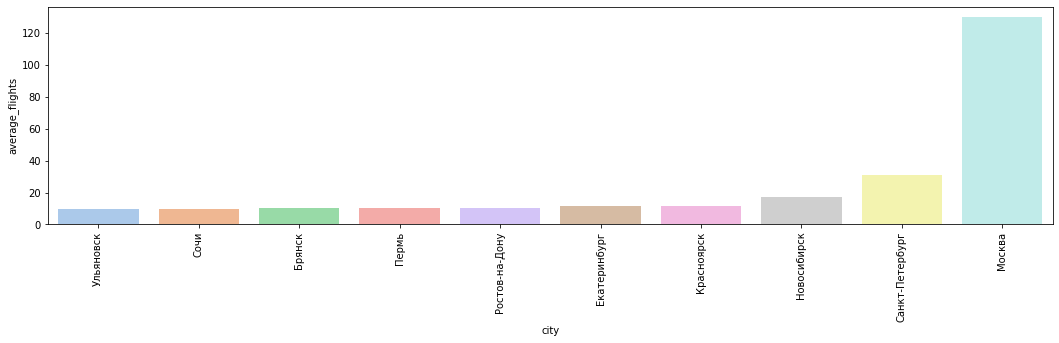

   index             city  average_flights
0     43           Москва       129.774194
1     70  Санкт-Петербург        31.161290
2     54      Новосибирск        17.322581
3     33       Красноярск        11.580645
4     20     Екатеринбург        11.322581
5     67   Ростов-на-Дону        10.193548
6     63            Пермь        10.129032
7     10           Брянск        10.000000
8     74             Сочи         9.612903
9     84        Ульяновск         9.580645
-------------------------------------
В среднем: 25.06774193548387
-------------------------------------


In [12]:

for_plot(top_10_city.sort_values(by = 'average_flights'), 'city', 'average_flights')

#### Наиболеее загруженные города, ожидаемо, Москва и Санкт-Петербург. Но даже наиближайшего "соседа" по рейтингу Москва  обгоняет в несколько раз

---

### Комментарий наставника

А почему Москва над всеми преобладает? Ладно, пусть над остальными, но Питер почему так отстает? Расскажи :)

---

In [ ]:
Москва предобладает по одной простой причины так 
как это крупнейший транспортный хаб в России (разполагаются 5 крупнейших аэропортов с огромным парком самолетов, 
я не удивлюсь если 80% парка самолетов будет числиться в Москве ) 
Да что там в России я думаю во всей Восточной Европе. Если у меня были данные по количеству рейсов скажем в Европу я думаю Москва 
ожидаемо в несколько раз обгоняла  бы Питер. 

#### 4. Проверка гипотезы

Чтобы проверить представленную гипотезу: «Средний спрос на билеты во время фестивалей не 
    
отличается от среднего спроса на билеты в обычное время», сформулируем нулевую гипотезу следующим образом, приняв пороговое значение alpha = 0.05:

средний спрос на билеты в обычное время равен среднему спросу на билеты во время фестивалей.

In [13]:

alpha = 0.05

In [14]:
results = st.ttest_ind(
    festivals_flights['ticket_amount'], festivals_flights.query('festival_week > 0.0')['ticket_amount']) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.32251818361504203
Не получилось отвергнуть нулевую гипотезу


По результатам проведенной проверки гипотезы зафиксируем:

спрос на билеты не зависит от проводимых фестивалей.

#### 5. Итоговый вывод

По результатам проведенной аналитический работы можно сделать следующие выводы:

наиболее задействованы в перелетах авиакомпании "F9" (сентябрь 2018 года) самолеты "Cessna 208 Caravan" (суммарно 4557 перелетов за месяц) 
и "Bombardier CRJ-200" (суммарно 4446 перелетов за месяц) Sukhoi SuperJet 4185;Основные перевозки более 80% осуществленны именно этими моделями

суммарно в сентябре на самолетах Boeing (весь модельный ряд) совершено 1530 перелетов;

суммарно в сентябре на самолетах Airbus (весь модельный ряд) совершено 1567 перелетов;

в среднем за сентябрь 2018 года каждый город, отраженный в данных, в среднем принял 5 рейсов;

топ-10 городов по насыщенности авиасообщения, осуществляемого силами авиакомпании "F9", возглявляют
Москва (~ 130 рейсов в день) и Санкт-Петербург (~ 31 рейс в день) и  Новосибирск   (~17.322581) более 70% рейсов.

всего в сентябре 2018 в Москве было проведено 3 крупных Фестиваля: Park Live, 
    
Пикник Афиши, Видфест. Их проведение, в среднем, не повлияло на количество

приобретенных билетов с пунктом назначения - Москва.

---

### Комментарий наставника

Поздравляю с сдачей первой работы модуля :)

Мне понравилась твоя работа. Ты грамотно используешь средства визуализации, и эффективно решаешь поставленные задачи.

Однако хочу обратить внимание, что будучи аналитиком, тебе следует писать более развернутые выводы. Не только то, что отслеживается с помощью твоего инструментария, а твоё собственное видение на этот счёт.

Напиши более развернутые выводы там, где я оставил комментарии, и приму твою работу.

Уверен, ты с этим справишься. Успеха! :)

---